In [2]:
import gurobipy as gp
from gurobipy import GRB

# Number of variables
n = 10  # You can set this to the desired number of variables

# Create a new model
model = gp.Model("max_sum_with_quadratic_constraint")

# Add variables
x = model.addVars(n, lb=0.0, name="x")

# Set objective: maximize sum of x_i
model.setObjective(gp.quicksum(x[i] for i in range(n)), GRB.MAXIMIZE)

# Add quadratic constraint: sum of squares of x_i <= 1
model.addQConstr(gp.quicksum(x[i] * x[i] for i in range(n)) <= 1, name="quad_constraint")

# Optimize model
model.optimize()

# Display the results
if model.status == GRB.OPTIMAL:
    print(f"Optimal objective value: {model.ObjVal}")
    # for v in model.getVars():
    #     print(f"{v.varName} = {v.x}")
else:
    print("No optimal solution found")


Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-27
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 0 rows, 10 columns and 0 nonzeros
Model fingerprint: 0xb90b9be8
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
  QRHS range       [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 11 rows, 11 columns, 11 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual        

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D81)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 101 rows, 10100 columns and 19900 nonzeros
Model fingerprint: 0x31b278a4
Model has 101 quadratic constraints
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e-02, 1e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-02, 3e-01]
  QRHS range       [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 502 rows, 10401 columns, 30501 nonzeros
Presolved model has 101 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.060e+04
 Factor NZ  : 5.090e+04 (roughly 5 MB of memory)
 Factor Ops : 7.466e+06 (less than 1 second per iteration)
 Threads    : 8

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual  

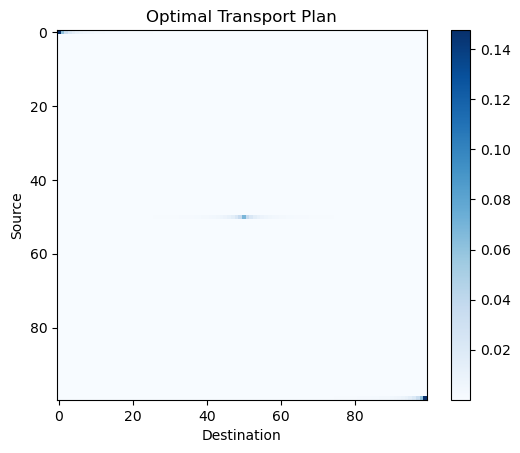

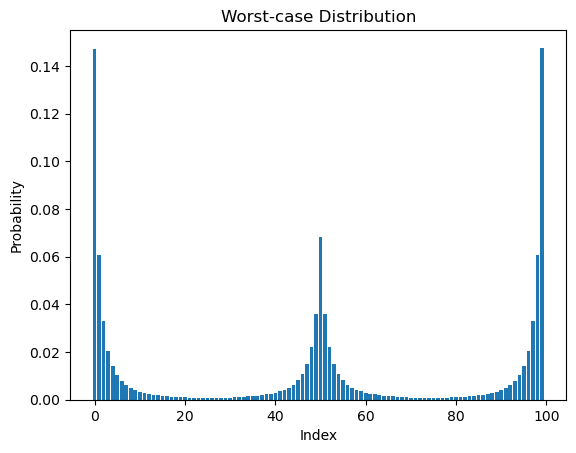

In [19]:
import gurobipy as gp
import numpy as np
from gurobipy import GRB


# Number of variables
n = 100  # You can set this to the desired number of variables

# Marginal nominal distribution
p = np.zeros(n,)
p[0] = 1/3
p[n // 2] = 1/3
p[n - 1] = 1/3

cost = [[np.abs(i - j) / n for j in range(n)] for i in range(n)]
radius = 0.03

# Create a new model
model = gp.Model("max_sum_with_quadratic_constraint")

# Add variables
x = model.addVars(n, lb=0.0, name="x")
y = model.addVars(n, n, lb=0.0, name='y')

# Set objective: maximize sum of x_i
model.setObjective(gp.quicksum(x[i] for i in range(n)) / n, GRB.MAXIMIZE)

# Add quadratic constraint: sum of squares of x_i <= 1
model.addQConstr(gp.quicksum(x[i] * x[i] for i in range(n)) <= 1, name="quad_constraint")
model.addConstrs((gp.quicksum(y[i, j] for j in range(n)) == p[i] for i in range(n)), name='y_sum')
for j in range(n):
    model.addQConstr((gp.quicksum(y[i, j] for i in range(n)) >= x[j] * x[j]), name='y_sumj')

model.addConstr(gp.quicksum(cost[i][j] * y[i, j] for i in range(n) for j in range(n)) <= radius, name='wasserstein')
# Optimize model
model.optimize()

# Display the results
if model.status == GRB.OPTIMAL:
    print(f"Optimal objective value: {model.ObjVal}")
    # for v in model.getVars():
    #     print(f"{v.varName} = {v.x}")
else:
    print("No optimal solution found")



# Visualize the optimal transport plan

import matplotlib.pyplot as plt

# Extract the optimal transport plan
optimal_plan = np.array([[y[i, j].x for j in range(n)] for i in range(n)])

# Plot the optimal transport plan
plt.imshow(optimal_plan, cmap="Blues")
plt.colorbar()
plt.xlabel("Destination")
plt.ylabel("Source")
plt.title("Optimal Transport Plan")
plt.show()


# Visualize the worst-case distribution

# Extract the worst-case distribution
worst_case_distribution0 = np.array([x[i].x ** 2 for i in range(n)])

# Plot the worst-case distribution
plt.bar(range(n), worst_case_distribution0)
plt.xlabel("Index")
plt.ylabel("Probability")
plt.title("Worst-case Distribution")
plt.show()


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 102 rows, 2600 columns and 7550 nonzeros
Model fingerprint: 0xa801b314
Model has 50 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [3e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 3e+00]
Presolve removed 50 rows and 700 columns
Presolve time: 0.00s
Presolved: 52 rows, 1900 columns, 5650 nonzeros
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.010e+02
 Factor NZ  : 5.590e+02 (roughly 1 MB of memory)
 Factor Ops : 1.060e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.95399341e+03  4.633

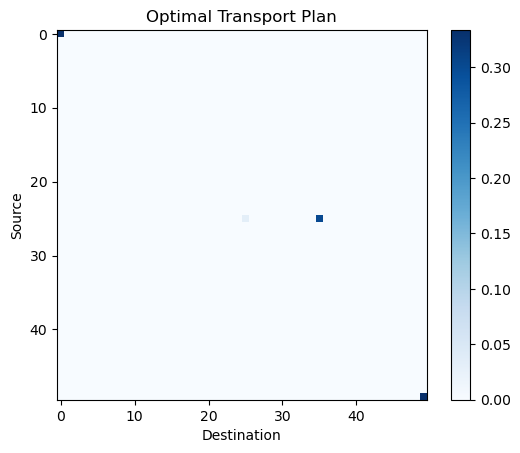

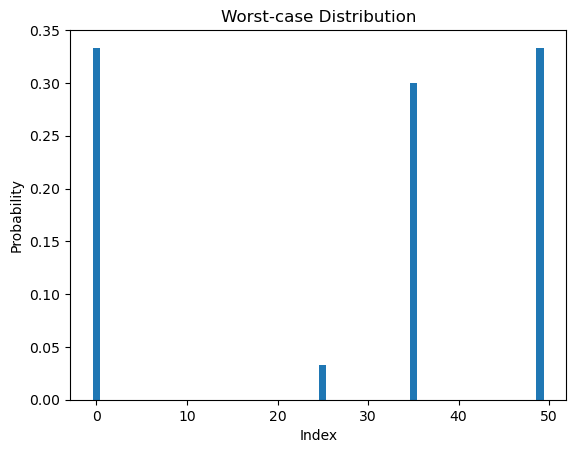

In [6]:
gamma_weights = np.array([np.exp(-np.abs(i - 35) / 10) for i in range(n)])*100

# Create a new model
model = gp.Model("max_sum_with_only_linear_terms")
# Add variables
x = model.addVars(n, lb=0.0, name="x")
y = model.addVars(n, n, lb=0.0, name='y')
s = model.addVars(n, lb=0.0, name='s')

# Set objective: maximize sum of x_i
model.setObjective(gp.quicksum(gamma_weights[i] * s[i] for i in range(n)), GRB.MAXIMIZE)

# Add quadratic constraint: sum of squares of x_i <= 1
model.addQConstr(gp.quicksum(s[i] for i in range(n)) <= 1, name="quad_constraint")
model.addConstrs((s[i] >= x[i]**2 for i in range(n)), name='si_and_xi')
model.addConstrs((gp.quicksum(y[i, j] for j in range(n)) == p[i] for i in range(n)), name='y_sum')
for j in range(n):
    model.addQConstr((gp.quicksum(y[i, j] for i in range(n)) == s[j]), name='y_sumj')

model.addConstr(gp.quicksum(cost[i][j] * y[i, j] for i in range(n) for j in range(n)) <= radius, name='wasserstein')
# Optimize model
model.optimize()

# Plot the optimal transport plan with values inside
optimal_plan = np.array([[y[i, j].x for j in range(n)] for i in range(n)])

plt.imshow(optimal_plan, cmap="Blues", data=True)
plt.colorbar()
plt.xlabel("Destination")
plt.ylabel("Source")
plt.title("Optimal Transport Plan")
plt.show()

worst_case_distribution1 = np.array([s[i].x for i in range(n)])

# Plot the worst-case distribution
plt.bar(range(n), worst_case_distribution1)
plt.xlabel("Index")
plt.ylabel("Probability")
plt.title("Worst-case Distribution")
plt.show()

# 1-D problem with mixed obj

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 102 rows, 2600 columns and 7550 nonzeros
Model fingerprint: 0x9296ed4f
Model has 50 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 3e+00]
Presolve time: 0.00s
Presolved: 252 rows, 2700 columns, 7800 nonzeros
Presolved model has 50 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.900e+03
 Factor NZ  : 5.853e+03 (roughly 1 MB of memory)
 Factor Ops : 3.615e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.076552

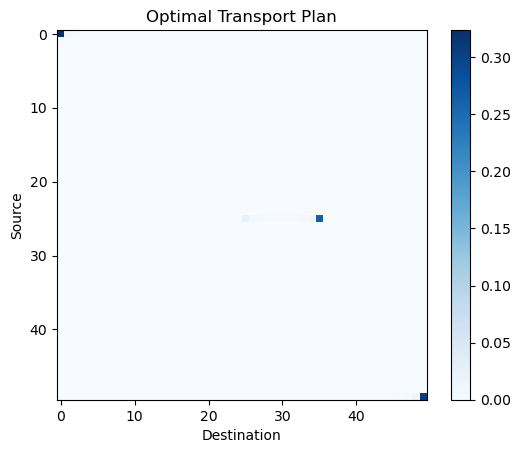

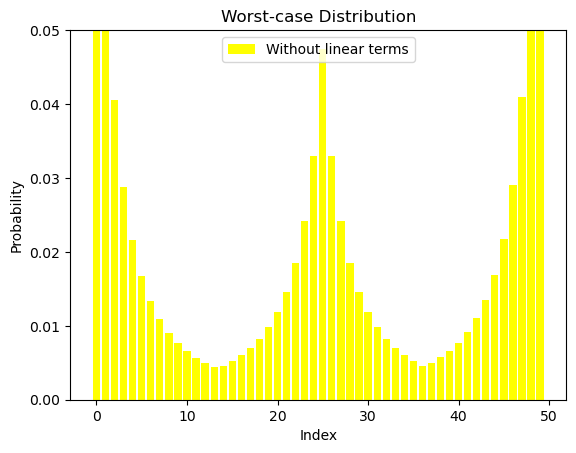

In [7]:
# Create a new model
model = gp.Model("max_sum_with_sqrt_x_plus_linear_terms")

# Add variables
x = model.addVars(n, lb=0.0, name="x")
y = model.addVars(n, n, lb=0.0, name='y')
s = model.addVars(n, lb=0.0, name='s')

# Set objective: maximize sum of x_i
model.setObjective(gp.quicksum(x[i] + gamma_weights[i] * s[i] for i in range(n)), GRB.MAXIMIZE)

# Add quadratic constraint: sum of squares of x_i <= 1
model.addQConstr(gp.quicksum(s[i] for i in range(n)) <= 1, name="quad_constraint")
model.addConstrs((s[i] >= x[i]**2 for i in range(n)), name='si_and_xi')
model.addConstrs((gp.quicksum(y[i, j] for j in range(n)) == p[i] for i in range(n)), name='y_sum')
for j in range(n):
    model.addQConstr((gp.quicksum(y[i, j] for i in range(n)) >= s[j]), name='y_sumj')

model.addConstr(gp.quicksum(cost[i][j] * y[i, j] for i in range(n) for j in range(n)) <= radius, name='wasserstein')
# Optimize model
model.optimize()

# Display the results
if model.status == GRB.OPTIMAL:
    print(f"Optimal objective value: {model.ObjVal}")
    # for v in model.getVars():
    #     print(f"{v.varName} = {v.x}")
else:
    print("No optimal solution found")



# Visualize the optimal transport plan

import matplotlib.pyplot as plt

# Extract the optimal transport plan
optimal_plan = np.array([[y[i, j].x for j in range(n)] for i in range(n)])

# Plot the optimal transport plan
plt.imshow(optimal_plan, cmap="Blues")
plt.colorbar()
plt.xlabel("Destination")
plt.ylabel("Source")
plt.title("Optimal Transport Plan")
plt.show()


# Visualize the worst-case distribution

# Extract the worst-case distribution
worst_case_distribution2 = np.array([s[i].x for i in range(n)])

# Plot the worst-case distribution
plt.bar(range(n), worst_case_distribution0, label='Without linear terms', color='yellow')
# plt.bar(range(n), worst_case_distribution1, label='Only linear terms', color='red')
# plt.plot(range(n), worst_case_distribution2, label='With linear terms', color='blue', alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Probability")
plt.ylim(0, 0.05)
plt.title("Worst-case Distribution")
plt.legend()
plt.show()


# 2D problems with BHH obj

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 401 rows, 160400 columns and 319600 nonzeros
Model fingerprint: 0xa8802a66
Model has 401 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 8e+00]
  QRHS range       [1e+00, 1e+00]
Presolve time: 0.06s
Presolved: 2002 rows, 161601 columns, 482001 nonzeros
Presolved model has 401 second-order cone constraints
Ordering time: 2.54s

Barrier statistics:
 Dense cols : 1
 AA' NZ     : 1.632e+05
 Factor NZ  : 3.268e+05 (roughly 70 MB of memory)
 Factor Ops : 1.723e+08 (less than 1 second per iteration)
 Threads    : 12

                  Objective                Residual
Iter       Primal         

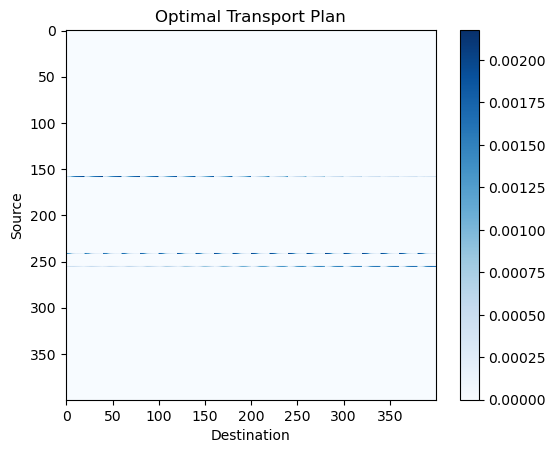

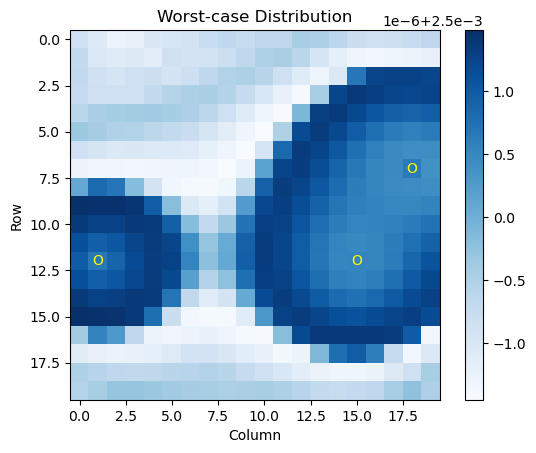

In [8]:
# 2-D support

# Number of variables
n = 20  # You can set this to the desired number of variables
n_sq = n * n

# Marginal nominal distribution
k = 3
nominal_points = np.random.choice(n_sq, k, replace=False)
nominal_points = np.sort(nominal_points)
# Set the probabilities of the chosen points to be 1/k
p = np.zeros(n_sq)
p[nominal_points] = 1 / k

cost = np.array([[np.linalg.norm(np.array([i // n, i % n]) - np.array([j // n, j % n])) for j in range(n_sq)] for i in range(n_sq)])
radius = 7.5

def gurobi_solves_primal(n, p, cost, radius):

    n_sq = n * n
    # Create a new model
    model = gp.Model("max_sum_with_quadratic_constraint")

    # Add variables
    x = model.addVars(n_sq, lb=0.0, name="x")
    y = model.addVars(n_sq, n_sq, lb=0.0, name='y')

    # Set objective: maximize sum of x_i
    model.setObjective(gp.quicksum(x[i] for i in range(n_sq)), GRB.MAXIMIZE)

    # Add quadratic constraint: sum of squares of x_i <= 1
    model.addQConstr(gp.quicksum(x[i] * x[i] for i in range(n_sq)) <= 1, name="quad_constraint")
    model.addConstrs((gp.quicksum(y[i, j] for j in range(n_sq)) == p[i] for i in range(n_sq)), name='y_sum')
    for j in range(n_sq):
        model.addQConstr((gp.quicksum(y[i, j] for i in range(n_sq)) >= x[j] * x[j]), name='y_sumj')

    model.addConstr(gp.quicksum(cost[i][j] * y[i, j] for i in range(n_sq) for j in range(n_sq)) <= radius, name='wasserstein')
    # Optimize model
    model.optimize()

    return model

def visualize_worst_dist(n, y, nomial_points):
    
    n_sq = n * n
    
    # Visualize the optimal transport plan
    import matplotlib.pyplot as plt
    # Extract the optimal transport plan

    optimal_plan = np.array([[y[i, j].x for j in range(n_sq)] for i in range(n_sq)])

    # Plot the optimal transport plan
    plt.imshow(optimal_plan, cmap="Blues")
    plt.colorbar()
    plt.xlabel("Destination")
    plt.ylabel("Source")
    plt.title("Optimal Transport Plan")
    plt.show()

    # Visualize the worst-case distribution (2-D support)
    # Extract the worst-case distribution

    worst_case_distribution = np.array([[optimal_plan.sum(axis=0)[i * n + j] for j in range(n)] for i in range(n)])

    # Plot the worst-case distribution, scale from zero to one

    plt.imshow(worst_case_distribution, cmap="Blues")
    plt.colorbar()
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.title("Worst-case Distribution")
    # plot the nominal points on the heatmap
    for i in range(n):
        for j in range(n):
            if i * n + j in nominal_points:
                plt.text(j, i, 'O', ha='center', va='center', color='yellow')
    plt.show()

optimized_primal = gurobi_solves_primal(n, p, cost, radius)
# Display the results
if optimized_primal.status == GRB.OPTIMAL:
    print(f"Optimal objective value: {optimized_primal.ObjVal}")
    # for v in model.getVars():
    #     print(f"{v.varName} = {v.x}")
else:
    print("No optimal solution found")

y = np.array([[optimized_primal.getVarByName(f'y[{i},{j}]') for j in range(n_sq)] for i in range(n_sq)])
visualize_worst_dist(n, y, nominal_points)

# 2-D problem with mixed obj

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1802 rows, 811800 columns and 2430900 nonzeros
Model fingerprint: 0x3f28c4fe
Model has 900 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 8e+00]
Presolve time: 0.39s
Presolved: 4502 rows, 813600 columns, 2435400 nonzeros
Presolved model has 900 second-order cone constraints
Ordering time: 0.03s

Barrier statistics:
 AA' NZ     : 8.172e+05
 Factor NZ  : 1.635e+06 (roughly 340 MB of memory)
 Factor Ops : 1.952e+09 (less than 1 second per iteration)
 Threads    : 8

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  

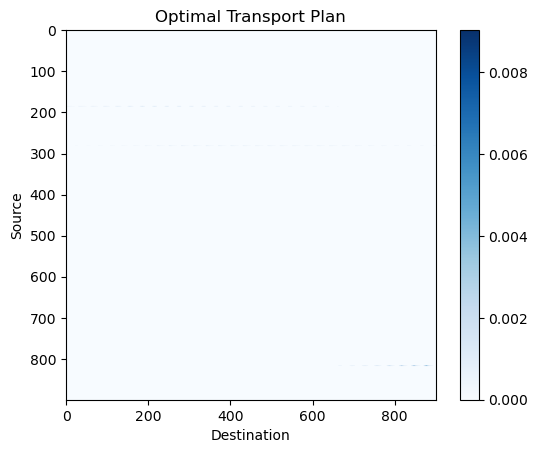

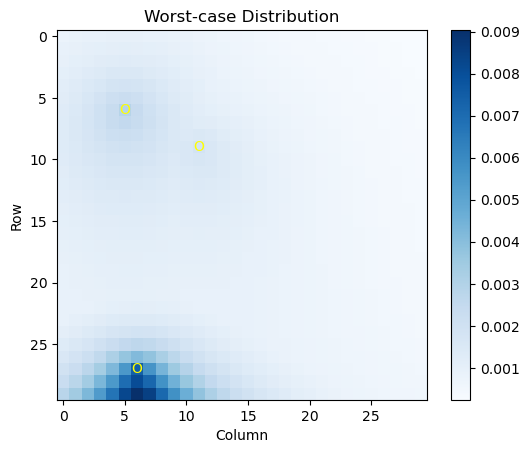

In [7]:
# 2-D support

# Number of variables
# n = 20  # You can set this to the desired number of variables
# n_sq = n * n
gamma_weights = np.array([np.exp(-np.abs(i - n_sq) / (0.5 * n_sq)) for i in range(n_sq)])*20

# Marginal nominal distribution
# k = 5
# nominal_points = np.random.choice(n_sq, k, replace=False)
# nominal_points = np.sort(nominal_points)
# # Set the probabilities of the chosen points to be 1/k
# p = np.zeros(n_sq)
# p[nominal_points] = 1 / k

cost = np.array([[np.linalg.norm(np.array([i // n, i % n]) - np.array([j // n, j % n])) for j in range(n_sq)] for i in range(n_sq)])
radius = 7.5

def gurobi_solves_primal(n, p, cost, radius):

    n_sq = n * n
    # Create a new model
    model = gp.Model("max_sum_with_sqrt_x_plus_linear_terms")

    # Add variables
    x = model.addVars(n_sq, lb=0.0, name="x")
    y = model.addVars(n_sq, n_sq, lb=0.0, name='y')
    s = model.addVars(n_sq, lb=0.0, name='s')

    # Set objective: maximize sum of x_i
    model.setObjective(gp.quicksum(x[i] + gamma_weights[i] * s[i] for i in range(n_sq)), GRB.MAXIMIZE)

    # Add quadratic constraint: sum of squares of x_i <= 1
    model.addQConstr(gp.quicksum(s[i] for i in range(n_sq)) <= 1, name="quad_constraint")
    model.addConstrs((s[i] >= x[i]**2 for i in range(n_sq)), name='si_and_xi')
    model.addConstrs((gp.quicksum(y[i, j] for j in range(n_sq)) == p[i] for i in range(n_sq)), name='y_sum')
    for j in range(n_sq):
        model.addQConstr((gp.quicksum(y[i, j] for i in range(n_sq)) >= s[j]), name='y_sumj')

    model.addConstr(gp.quicksum(cost[i][j] * y[i, j] for i in range(n_sq) for j in range(n_sq)) <= radius, name='wasserstein')
    # Optimize model
    model.optimize()

    return model

def visualize_worst_dist(n, y, nomial_points):
    
    n_sq = n * n
    
    # Visualize the optimal transport plan
    import matplotlib.pyplot as plt
    # Extract the optimal transport plan

    optimal_plan = np.array([[y[i, j].x for j in range(n_sq)] for i in range(n_sq)])

    # Plot the optimal transport plan
    plt.imshow(optimal_plan, cmap="Blues")
    plt.colorbar()
    plt.xlabel("Destination")
    plt.ylabel("Source")
    plt.title("Optimal Transport Plan")
    plt.show()

    # Visualize the worst-case distribution (2-D support)
    # Extract the worst-case distribution

    worst_case_distribution = np.array([[optimal_plan.sum(axis=0)[i * n + j] for j in range(n)] for i in range(n)])

    # Plot the worst-case distribution, scale from zero to one

    plt.imshow(worst_case_distribution, cmap="Blues")
    plt.colorbar()
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.title("Worst-case Distribution")
    # plot the nominal points on the heatmap
    for i in range(n):
        for j in range(n):
            if i * n + j in nominal_points:
                plt.text(j, i, 'O', ha='center', va='center', color='yellow')
    plt.show()

optimized_primal = gurobi_solves_primal(n, p, cost, radius)
# Display the results
if optimized_primal.status == GRB.OPTIMAL:
    print(f"Optimal objective value: {optimized_primal.ObjVal}")
    # for v in model.getVars():
    #     print(f"{v.varName} = {v.x}")
else:
    print("No optimal solution found")

y = np.array([[optimized_primal.getVarByName(f'y[{i},{j}]') for j in range(n_sq)] for i in range(n_sq)])
visualize_worst_dist(n, y, nominal_points)

# Dual problem of 2D SDP solved by Gurobi

In [8]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model
SDP_dual = gp.Model("SDP_dual")

# Add variables
lambda_var = SDP_dual.addVar(name="lambda", vtype=GRB.CONTINUOUS, lb=0.0)
tau = SDP_dual.addVar(name="tau", vtype=GRB.CONTINUOUS, lb=0.0)
mu = SDP_dual.addVars(n_sq, name="mu", vtype=GRB.CONTINUOUS, lb=-GRB.INFINITY)
nu = SDP_dual.addVars(n_sq, name="nu", vtype=GRB.CONTINUOUS, lb=0.0)
rho = SDP_dual.addVars(n_sq, name="rho", vtype=GRB.CONTINUOUS, lb=-GRB.INFINITY)

# Add constraints
for i in range(n_sq):
    SDP_dual.addConstr(rho[i] * (tau + nu[i]) >= 1/4, name=f"SDP_constr_{i}")
    SDP_dual.addConstr(rho[i] >= 0, name=f"SDP_constr_{i}")
    SDP_dual.addConstr(tau + nu[i] >= 0, name=f"SDP_constr_{i}")
    for j in range(n_sq):
        SDP_dual.addConstr(lambda_var * cost[i][j] + mu[i] - nu[j] >= 0, name=f"linear_constr_{i}_{j}")
        
# Objective
SDP_dual.setObjective((gp.quicksum(rho[i] for i in range(n_sq)) + lambda_var * radius + gp.quicksum(mu[i] * p[i] for i in range(n_sq)) + tau), GRB.MINIMIZE)

# Optimize model
SDP_dual.setParam('NonConvex', 2)
SDP_dual.optimize()

# Display the results
if SDP_dual.status == GRB.OPTIMAL:
    print(f"Optimal objective value: {SDP_dual.ObjVal}")
    # for v in SDP_dual.getVars():
    #     print(f"{v.varName} = {v.x}")
else:
    print("No optimal solution found")

Set parameter NonConvex to value 2
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 811800 rows, 2702 columns and 2431800 nonzeros
Model fingerprint: 0xc9164065
Model has 900 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [3e-01, 8e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
  QRHS range       [2e-01, 2e-01]
Presolve removed 809100 rows and 897 columns
Presolve time: 0.13s
Presolved: 6300 rows, 5405 columns, 17097 nonzeros
Presolved model has 900 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 5
 AA' NZ     : 1.620e+04
 Factor NZ  : 5.672e+04 (roughly 5 MB of memory)
 Factor Ops : 5.356e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective               

# Dual problem of 2D SDP solved by COPT

In [25]:
import coptpy as cp
from coptpy import COPT


def copt_solves_dual(n, p, cost, radius):

    # Create COPT environment
    env = cp.Envr()

    # Create COPT model
    m = env.createModel("sdp_dual")

    A = m.addSparseMat(2, rows=[0], cols=[1], vals=[1.0])
    B = m.addSparseMat(2, [(0, 0, 1.0)])
    C = m.addSparseMat(2, [(1, 1, 1.0)])

    # Add variables
    lambda_var = m.addVar(lb=0.0, ub=COPT.INFINITY ,name="lambda")
    tau = m.addVar(lb=0.0, ub=COPT.INFINITY, name="tau")
    mu = m.addVars(n_sq, lb=-COPT.INFINITY, ub=COPT.INFINITY, nameprefix="mu")
    nu = m.addVars(n_sq, lb=0.0, ub=COPT.INFINITY, nameprefix="nu")
    rho = m.addVars(n_sq, lb=0.0, ub=COPT.INFINITY, nameprefix="rho")
    X_bars = m.addPsdVars([2 for _ in range(n_sq)], nameprefix="X_bar")

    # Add constraints
    for i in range(n_sq):
        m.addConstr(A * X_bars[i] == 1)
        m.addConstr(B * X_bars[i] == rho[i])
        m.addConstr(C * X_bars[i] == (tau + nu[i]))

        for j in range(n_sq):
            m.addConstr(lambda_var * cost[i][j] + mu[i] - nu[j] >= 0, name=f"linear_constr_{i}_{j}")

    # Set objective
    m.setObjective((lambda_var * radius + tau + cp.quicksum(rho) + cp.quicksum([mu[i] * p[i] for i in range(n_sq)])), sense=COPT.MINIMIZE)

    # Optimize model
    m.solve()

    return m
 

optimized_dual = copt_solves_dual(n, p, cost, radius)
if optimized_dual.status == COPT.OPTIMAL:
    print(f"Optimal objective value: {optimized_dual.ObjVal}")
    for v in optimized_dual.getVars():
        print(f"{v.getName()} = {v.x}")

Cardinal Optimizer v7.1.7. Build date Sep 24 2024
Copyright Cardinal Operations 2024. All Rights Reserved

Model fingerprint: b33c5eea

Using Cardinal Optimizer v7.1.7 on macOS (aarch64)
Hardware has 12 cores and 12 threads. Using instruction set ARMV8 (30)
Minimizing an SDP problem

The original problem has:
    160000 rows, 1202 columns and 479600 non-zero elements
    400 PSD columns
    1200 PSD constraints

Using Primal-Dual Method

Starting barrier solver using 12 threads

Problem info:
Range of matrix coefficients:    [6e-02,1e+00]
Range of rhs coefficients:       [1e+00,1e+00]
Range of bound coefficients:     [0e+00,0e+00]
Range of cost coefficients:      [2e-02,6e-02]

Factor info:
Number of dense columns:         803
Number of matrix entries:        6.440e+05
Number of factor entries:        2.646e+06
Number of factor flops:          2.681e+09

Iter       Primal.Obj         Dual.Obj      Compl  Primal.Inf  Dual.Inf    Time
   0  +0.00000000e+00  +0.00000000e+00   1.62e+05    

In [30]:
optimized_dual.getVarByName("mu(0)").x

3.291398188821967

# MISDP partition problem with fixed cost + Robust BHH coefficient

$$\begin{aligned}
    \min_{z,f, \kappa, u; \lambda, \mu, \nu, \tau} &\quad \sum_j \kappa_j + u \\
    \text{s.t.} \quad
    & \sum_{j} z_{ij}=1, \forall i \\
    & \sum_j z_{jj} = k \\
    & z_{ij}\leq z_{jj}, \forall i, j \\
    & f^j(\delta^-(i))-f^j(\delta^+(i))=z_{ij}, \forall i\in V\backslash \{j\},\forall j \\
    & f^j(\delta^-(i))\leq (n-1)z_{ij}, \forall i \in V\backslash \{j\}, \forall j \\
    & f^j(\delta^-(j))=0, \forall j\\
    & f_{ij}^v\geq 0, \forall i, j\in A, \forall v\\
    & \kappa_j\geq 0, \forall j \\
    & \kappa_j\geq \kappa(\mathbf{v}_i)z_{ij}, \forall i, j \\
    & u\geq \sum_i \rho_{ij}+\lambda r+\mu^Tp + \tau, \forall j \\
    & \begin{pmatrix}
      \rho_{ij} & z_{ij}/2 \\ z_{ij}/2 & \tau+\nu_i
    \end{pmatrix}\succeq 0, \forall i, j \\
    & \lambda c_{ij}+\mu_i-\nu_j\geq 0, \forall i, j \\
    & \lambda, \tau, \nu\geq 0, \forall i \\
    & z_{ij} \text{  binary}, \forall i, j
\end{aligned}$$

In [10]:
# Parameters

n = 4          # n is the number of small blocks in each row and column
n_sq = n * n   # n_sq is the total number of small blocks
p = np.zeros(n_sq,)  # p is the marginal nominal distribution
num_districts = 3
# Choose k nominal points in the range of n_sq
k = 9
nominal_points = np.random.choice(n_sq, k, replace=False)
nominal_points = np.sort(nominal_points)
# Set the probabilities of the chosen points to be 1/k
p[nominal_points] = 1 / k
# normalized cost matrix by the region size
cost = np.array([[np.linalg.norm(np.array([i // n, i % n]) - np.array([j // n, j % n])) for j in range(n_sq)] for i in range(n_sq)])
radius = 1 * n
# Set the ODD cost features 
cost_feature0 = np.array([np.exp(-np.abs(i - (n_sq / 2)) / 10) for i in range(n_sq)])
cost_feature1 = np.array([np.exp(-np.abs(i - (n_sq / 3)) / 30) for i in range(n_sq)])
cost_features = np.array([cost_feature0, cost_feature1]).T
unit_cost = np.array([1, 2])
block_odd_cost = np.dot(cost_features, unit_cost)
block_odd_cost = block_odd_cost / np.max(block_odd_cost)

# Graph adjacency matrix of the small blocks here we use grid graph
adjacency = np.zeros((n_sq, n_sq))
for i in range(n_sq):
    for j in range(n_sq):
        if np.linalg.norm(np.array([i // n, i % n]) - np.array([j // n, j % n])) == 1:
            adjacency[i, j] = 1
arc_list = np.array(np.where(adjacency == 1)).T
in_node_list = {i: list(arc_list[arc_list[:, 1] == i][:, 0]) for i in range(n_sq)}
out_node_list = {i: list(arc_list[arc_list[:, 0] == i][:, 1]) for i in range(n_sq)}
in_arc_list = {i: [(j, i) for j in in_node_list[i]] for i in range(n_sq)}
out_arc_list = {i: [(i, j) for j in out_node_list[i]] for i in range(n_sq)}
# Convert all lists in arc_list to tuples
arc_list = [tuple(arc_list[i]) for i in range(arc_list.shape[0])]
# flow indices is the cartesian product of n_sq list and arc_list
flow_indices = [(i, arc) for i in range(n_sq) for arc in arc_list]

In [11]:
# Create COPT environment
env = cp.Envr()

# Create COPT model
robust_bhh_fc_parition = env.createModel("robust_bhh_fc_parition")

A = robust_bhh_fc_parition.addSparseMat(2, rows=[0], cols=[1], vals=[1.0])
B = robust_bhh_fc_parition.addSparseMat(2, [(0, 0, 1.0)])
C = robust_bhh_fc_parition.addSparseMat(2, [(1, 1, 1.0)])

# Add variables
## Partition variables
z = robust_bhh_fc_parition.addVars(n_sq, n_sq, lb=0.0, ub=1.0, nameprefix="z") # relaxation of the partition variables
flows = robust_bhh_fc_parition.addVars(flow_indices, lb=0.0, ub=COPT.INFINITY, nameprefix="flows")

## Moment problem dual variables
lambda_var = robust_bhh_fc_parition.addVar(lb=0.0, ub=COPT.INFINITY ,name="lambda")
tau = robust_bhh_fc_parition.addVar(lb=0.0, ub=COPT.INFINITY, name="tau")
mu = robust_bhh_fc_parition.addVars(n_sq, lb=-COPT.INFINITY, ub=COPT.INFINITY, nameprefix="mu")
nu = robust_bhh_fc_parition.addVars(n_sq, lb=0.0, ub=COPT.INFINITY, nameprefix="nu")
rho = robust_bhh_fc_parition.addVars(n_sq, n_sq, lb=0.0, ub=COPT.INFINITY, nameprefix="rho")
X_bars = robust_bhh_fc_parition.addPsdVars([[2 for _ in range(n_sq)] for _ in range(n_sq)], nameprefix="X_bar")

## ODD cost variables
kap = robust_bhh_fc_parition.addVars(n_sq, lb=0.0, ub=COPT.INFINITY, nameprefix="kap")

## Robust district BHH variables
u = robust_bhh_fc_parition.addVar(lb=0.0, ub=COPT.INFINITY, name="u")

# Add constraints
## Partition constraints
robust_bhh_fc_parition.addConstrs(cp.quicksum(z[i, j] for j in range(n_sq)) == 1 for i in range(n_sq))
robust_bhh_fc_parition.addConstr(cp.quicksum(z[j, j] for j in range(n_sq)) == num_districts)
robust_bhh_fc_parition.addConstrs(z[i, j] <= z[j, j] for i in range(n_sq) for j in range(n_sq))
for j in range(n_sq):
    robust_bhh_fc_parition.addConstr(cp.quicksum(flows[j, arc] for arc in in_arc_list[j]) == 0, name=f"no_return_flow_{j}")
    for i in range(n_sq):
        if i != j:
            robust_bhh_fc_parition.addConstr(cp.quicksum(flows[j, arc] for arc in in_arc_list[i]) - cp.quicksum(flows[j, arc] for arc in out_arc_list[i]) == z[i, j], name=f"flow_assign_{i}_{j}")
            robust_bhh_fc_parition.addConstr(cp.quicksum(flows[j, arc] for arc in in_arc_list[i]) <= (n_sq - 1) * z[i, j], name=f"flow_restrict_{i}_{j}")

## Moment problem dual constraints
for j in range(n_sq):
    for i in range(n_sq):
        robust_bhh_fc_parition.addConstr(A * X_bars[i * n_sq + j] == z[i, j])
        robust_bhh_fc_parition.addConstr(B * X_bars[i * n_sq + j] == rho[i, j])
        robust_bhh_fc_parition.addConstr(C * X_bars[i * n_sq +  j] == (tau + nu[i]))
        robust_bhh_fc_parition.addConstr(lambda_var * cost[i][j] + mu[i] - nu[j] >= 0, name=f"linear_dual_constr_{i}_{j}")
    robust_bhh_fc_parition.addConstr(u >= cp.quicksum([rho[i, j] for i in range(n_sq)]) + lambda_var * radius + cp.quicksum(mu[i] * p[i] for i in range(n_sq)) + tau, name=f"robust_bhh_{j}")

## ODD cost constraints
robust_bhh_fc_parition.addConstrs(kap[j] >= block_odd_cost[i] * z[i, j] for i in range(n_sq) for j in range(n_sq))

# Set objective
robust_bhh_fc_parition.setObjective((cp.quicksum(kap) + u), sense=COPT.MINIMIZE)

# Optimize model
robust_bhh_fc_parition.solve()

Cardinal Optimizer v7.1.6. Build date Sep  2 2024
Copyright Cardinal Operations 2024. All Rights Reserved

Model fingerprint: 2cf53941

Using Cardinal Optimizer v7.1.6 on macOS (aarch64)
Hardware has 8 cores and 8 threads. Using instruction set ARMV8 (30)
Minimizing an SDP problem

The original problem has:
    1297 rows, 1331 columns and 5152 non-zero elements
    256 PSD columns
    768 PSD constraints

Using Primal-Dual Method

Starting barrier solver using 8 threads

Problem info:
Range of matrix coefficients:    [3e-02,1e+00]
Range of rhs coefficients:       [8e-01,1e+00]
Range of bound coefficients:     [1e+00,8e+00]
Range of cost coefficients:      [2e-01,1e+00]

Factor info:
Number of dense columns:         68
Number of matrix entries:        9.847e+03
Number of factor entries:        2.097e+05
Number of factor flops:          7.356e+07

Iter       Primal.Obj         Dual.Obj      Compl  Primal.Inf  Dual.Inf    Time
   0  +0.00000000e+00  -4.00000000e+02   2.95e+03    1.00e+00 

In [12]:
# Display the results
if robust_bhh_fc_parition.status == COPT.OPTIMAL:
    print(f"Optimal objective value: {robust_bhh_fc_parition.ObjVal}")
    for v in robust_bhh_fc_parition.getVars():
        print(f"{v.getName()} = {np.round(v.x, 3)}")
    for X_bar in robust_bhh_fc_parition.getPsdVars():
        print(f"{X_bar.getName()} = {X_bar.x}")
else:
    print("INFEASIBLE")

Optimal objective value: 2.7444383194932196
z(0,0) = 0.307
z(0,1) = 0.016
z(0,2) = 0.025
z(0,3) = 0.043
z(0,4) = 0.069
z(0,5) = 0.08
z(0,6) = 0.08
z(0,7) = 0.08
z(0,8) = 0.08
z(0,9) = 0.081
z(0,10) = 0.056
z(0,11) = 0.033
z(0,12) = 0.019
z(0,13) = 0.013
z(0,14) = 0.01
z(0,15) = 0.008
z(1,0) = 0.012
z(1,1) = 0.297
z(1,2) = 0.027
z(1,3) = 0.045
z(1,4) = 0.073
z(1,5) = 0.08
z(1,6) = 0.08
z(1,7) = 0.08
z(1,8) = 0.08
z(1,9) = 0.081
z(1,10) = 0.059
z(1,11) = 0.035
z(1,12) = 0.02
z(1,13) = 0.014
z(1,14) = 0.01
z(1,15) = 0.008
z(2,0) = 0.014
z(2,1) = 0.02
z(2,2) = 0.261
z(2,3) = 0.052
z(2,4) = 0.084
z(2,5) = 0.08
z(2,6) = 0.08
z(2,7) = 0.08
z(2,8) = 0.08
z(2,9) = 0.081
z(2,10) = 0.068
z(2,11) = 0.04
z(2,12) = 0.023
z(2,13) = 0.016
z(2,14) = 0.012
z(2,15) = 0.01
z(3,0) = 0.026
z(3,1) = 0.035
z(3,2) = 0.055
z(3,3) = 0.116
z(3,4) = 0.088
z(3,5) = 0.08
z(3,6) = 0.08
z(3,7) = 0.08
z(3,8) = 0.08
z(3,9) = 0.081
z(3,10) = 0.1
z(3,11) = 0.072
z(3,12) = 0.041
z(3,13) = 0.028
z(3,14) = 0.021
z(3,15) = 0.

#### Branch and Bound to solve the MISDP

In [2]:
import random
import numpy as np
import coptpy as cp
from coptpy import COPT

class MISDP:
    def __init__(self, n, p, cost, radius, block_odd_cost, num_districts, adjacency):
        self.n = n
        self.n_sq = n * n
        self.p = p
        self.cost = cost
        self.radius = radius
        self.block_odd_cost = block_odd_cost
        self.num_districts = num_districts
        self.adjacency = adjacency
        self.init_graph_params()

    def init_graph_params(self):
        self.arc_list = np.array(np.where(self.adjacency == 1)).T
        self.in_node_list = {i: list(self.arc_list[self.arc_list[:, 1] == i][:, 0]) for i in range(self.n_sq)}
        self.out_node_list = {i: list(self.arc_list[self.arc_list[:, 0] == i][:, 1]) for i in range(self.n_sq)}
        self.in_arc_list = {i: [(j, i) for j in self.in_node_list[i]] for i in range(self.n_sq)}
        self.out_arc_list = {i: [(i, j) for j in self.out_node_list[i]] for i in range(self.n_sq)}
        # Convert all lists in arc_list to tuples
        self.arc_list = [tuple(self.arc_list[i]) for i in range(self.arc_list.shape[0])]
        # flow indices is the cartesian product of n_sq list and arc_list
        self.flow_indices = [(i, arc) for i in range(self.n_sq) for arc in self.arc_list]


    def SDP(self):
        n_sq = self.n_sq
        # Create COPT environment
        env = cp.Envr()

        # Create COPT model
        robust_bhh_fc_parition = env.createModel("robust_bhh_fc_parition")

        A = robust_bhh_fc_parition.addSparseMat(2, rows=[0], cols=[1], vals=[1.0])
        B = robust_bhh_fc_parition.addSparseMat(2, [(0, 0, 1.0)])
        C = robust_bhh_fc_parition.addSparseMat(2, [(1, 1, 1.0)])

        # Add variables
        ## Partition variables
        z = robust_bhh_fc_parition.addVars(n_sq, n_sq, lb=0.0, ub=1.0, nameprefix="z") # relaxation of the partition variables
        flows = robust_bhh_fc_parition.addVars(self.flow_indices, lb=0.0, ub=COPT.INFINITY, nameprefix="flows")

        ## Moment problem dual variables
        lambda_var = robust_bhh_fc_parition.addVar(lb=0.0, ub=COPT.INFINITY ,name="lambda")
        tau = robust_bhh_fc_parition.addVar(lb=0.0, ub=COPT.INFINITY, name="tau")
        mu = robust_bhh_fc_parition.addVars(n_sq, lb=-COPT.INFINITY, ub=COPT.INFINITY, nameprefix="mu")
        nu = robust_bhh_fc_parition.addVars(n_sq, lb=0.0, ub=COPT.INFINITY, nameprefix="nu")
        rho = robust_bhh_fc_parition.addVars(n_sq, n_sq, lb=0.0, ub=COPT.INFINITY, nameprefix="rho")
        X_bars = robust_bhh_fc_parition.addPsdVars([[2 for _ in range(n_sq)] for _ in range(n_sq)], nameprefix="X_bar")

        ## ODD cost variables
        kap = robust_bhh_fc_parition.addVars(n_sq, lb=0.0, ub=COPT.INFINITY, nameprefix="kap")

        ## Robust district BHH variables
        u = robust_bhh_fc_parition.addVar(lb=0.0, ub=COPT.INFINITY, name="u")

        # Add constraints
        ## Partition constraints
        robust_bhh_fc_parition.addConstrs(cp.quicksum(z[i, j] for j in range(n_sq)) == 1 for i in range(n_sq))
        robust_bhh_fc_parition.addConstr(cp.quicksum(z[j, j] for j in range(n_sq)) == self.num_districts)
        robust_bhh_fc_parition.addConstrs(z[i, j] <= z[j, j] for i in range(n_sq) for j in range(n_sq))
        for j in range(n_sq):
            robust_bhh_fc_parition.addConstr(cp.quicksum(flows[j, arc] for arc in self.in_arc_list[j]) == 0, name=f"no_return_flow_{j}")
            for i in range(n_sq):
                if i != j:
                    robust_bhh_fc_parition.addConstr(cp.quicksum(flows[j, arc] for arc in self.in_arc_list[i]) - cp.quicksum(flows[j, arc] for arc in self.out_arc_list[i]) == z[i, j], name=f"flow_assign_{i}_{j}")
                    robust_bhh_fc_parition.addConstr(cp.quicksum(flows[j, arc] for arc in self.in_arc_list[i]) <= (n_sq - 1) * z[i, j], name=f"flow_restrict_{i}_{j}")

        ## Moment problem dual constraints
        for j in range(n_sq):
            for i in range(n_sq):
                robust_bhh_fc_parition.addConstr(A * X_bars[i * n_sq + j] == z[i, j])
                robust_bhh_fc_parition.addConstr(B * X_bars[i * n_sq + j] == rho[i, j])
                robust_bhh_fc_parition.addConstr(C * X_bars[i * n_sq +  j] == (tau + nu[i]))
                robust_bhh_fc_parition.addConstr(lambda_var * self.cost[i][j] + mu[i] - nu[j] >= 0, name=f"linear_dual_constr_{i}_{j}")
            robust_bhh_fc_parition.addConstr(u >= cp.quicksum([rho[i, j] for i in range(n_sq)]) + lambda_var * self.radius + cp.quicksum(mu[i] * self.p[i] for i in range(n_sq)) + tau, name=f"robust_bhh_{j}")

        ## ODD cost constraints
        robust_bhh_fc_parition.addConstrs(kap[j] >= self.block_odd_cost[i] * z[i, j] for i in range(n_sq) for j in range(n_sq))
        robust_bhh_fc_parition.addConstr(z[0, 0] == 1)
        robust_bhh_fc_parition.addConstr(z[8, 8] == 1)
        robust_bhh_fc_parition.addConstr(z[15, 15] == 1)
        robust_bhh_fc_parition.addConstr(z[5, 5] == 1)

        # Set objective
        robust_bhh_fc_parition.setObjective((cp.quicksum(kap) + u), sense=COPT.MINIMIZE)

        # Supress output
        robust_bhh_fc_parition.setParam('Logging', False)

        return robust_bhh_fc_parition

    def Branch_and_Bound(self, tol=1e-6):
        iterative_lower_bounds = []
        iterative_upper_bounds = []

        ub = np.inf
        lower_bounds = []
        upper_bounds = []
        integer_models = []

        root_model = self.SDP()
        root_model.solve()
        lower_bounds.append(root_model.ObjVal)
        lb = min(lower_bounds)
        iterative_lower_bounds.append(lb)
        iterative_upper_bounds.append(ub)
        queue = [root_model]

        count = 0
        while (ub - lb) > tol and queue and count < 10000:
            count += 1
            print(f"DEBUG: Iteration {count}, Lower Bound: {lb}, Upper Bound: {ub}")
            model = queue.pop(0)
            local_lb = lower_bounds.pop(0)
            if local_lb < ub:
                # Get the fractional partition variable by randomly selecting z(i, j)
                integer_flag = True
                permutation0 = list(range(self.n_sq))
                permutation1 = list(range(self.n_sq))
                np.random.shuffle(permutation0)
                np.random.shuffle(permutation1)
                for i in permutation0:
                    for j in permutation1:
                        z = model.getVarByName(f'z({i},{j})')
                        if z.x > tol and z.x < 1 - tol:
                            integer_flag = False
                            break
                    if not integer_flag:
                        break

                if integer_flag:
                    if ub > local_lb:
                        integer_models.append(model)
                        ub = local_lb
                        upper_bounds.append(ub)
                        iterative_lower_bounds.append(lb)
                        iterative_upper_bounds.append(ub)
                        continue
                else:
                    # branch
                    model0, model1 = model.clone(), model.clone()
                    # add the branching constraint
                    z = model.getVarByName(f'z({i},{j})')
                    model0.addConstr(z <= 0)
                    model1.addConstr(z >= 1)
                    model0.solve()
                    model1.solve()
                    # add model0 and model1 to the queue if they are both optimal
                    if model0.status == COPT.OPTIMAL:
                        queue.append(model0)
                        lower_bounds.append(model0.ObjVal)
                    if model1.status == COPT.OPTIMAL:
                        queue.append(model1)
                        lower_bounds.append(model1.ObjVal)

                    # if model0.status == COPT.INFEASIBLE and model1.status == COPT.INFEASIBLE:
                    #     print(f"DEBUG: Both children are infeasible, returning to the parent node with the lower bound {local_lb}")
                    #     queue.append(model)
                    #     lower_bounds.append(local_lb)
                    # else:
                    #     lb = min(lower_bounds)
                    #     print(f"DEBUG: At least one child is feasible, new global lower bound: {lb}")
                    lb = min(lower_bounds)
                    iterative_lower_bounds.append(lb)
                    iterative_upper_bounds.append(ub)

            else:
                iterative_lower_bounds.append(lb)
                iterative_upper_bounds.append(ub)
                continue

        best_model = integer_models[-1]

        return best_model, iterative_lower_bounds, iterative_upper_bounds, integer_models


# Parameters
n = 5         # n is the number of small blocks in each row and column
n_sq = n * n   # n_sq is the total number of small blocks
p = np.zeros(n_sq,)  # p is the marginal nominal distribution
num_districts = 4
# Choose k nominal points in the range of n_sq
k = 5
nominal_points = np.random.choice(n_sq, k, replace=False)
nominal_points = np.sort(nominal_points)
# Set the probabilities of the chosen points to be 1/k
p[nominal_points] = 1 / k
# normalized cost matrix by the region size
cost = np.array([[np.linalg.norm(np.array([i // n, i % n]) - np.array([j // n, j % n])) for j in range(n_sq)] for i in range(n_sq)])
radius = 1 * n
# Set the ODD cost features 
cost_feature0 = np.array([np.exp(-np.abs(i - (n_sq / 2)) / 10) for i in range(n_sq)])
cost_feature1 = np.array([np.exp(-np.abs(i - (n_sq / 3)) / 30) for i in range(n_sq)])
cost_features = np.array([cost_feature0, cost_feature1]).T
unit_cost = np.array([1, 2])
block_odd_cost = np.dot(cost_features, unit_cost)
block_odd_cost = block_odd_cost / np.max(block_odd_cost)

# Graph adjacency matrix of the small blocks here we use grid graph
adjacency = np.zeros((n_sq, n_sq))
for i in range(n_sq):
    for j in range(n_sq):
        if np.linalg.norm(np.array([i // n, i % n]) - np.array([j // n, j % n])) == 1:
            adjacency[i, j] = 1

# Create MISDP model
misdp = MISDP(n, p, cost, radius, block_odd_cost, num_districts, adjacency)
best_model, lower_bounds, upper_bounds, integer_models = misdp.Branch_and_Bound()

# Display the results
if best_model.status == COPT.OPTIMAL:
    print(f"Optimal objective value: {best_model.ObjVal}")
    for v in best_model.getVars():
        print(f"{v.getName()} = {np.round(v.x, 3)}")

# Plot the iterative lower bounds and upper bounds
plt.plot(lower_bounds, label="Lower Bound")
plt.plot(upper_bounds, label="Upper Bound")
plt.xlabel("Iterations")
plt.ylabel("Objective Value Bound")
plt.title("Branch-and-Bound")
plt.legend()
plt.show()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/homebrew/anaconda3/envs/optimization/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/homebrew/anaconda3/envs/optimization/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/homebrew/anaconda3/envs/optimization/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 7

Cardinal Optimizer v7.1.7. Build date Sep 24 2024
Copyright Cardinal Operations 2024. All Rights Reserved

DEBUG: Iteration 1, Lower Bound: 4.8499235639013705, Upper Bound: inf
DEBUG: Iteration 2, Lower Bound: 4.856906371467739, Upper Bound: inf
DEBUG: Iteration 3, Lower Bound: 4.863750402193283, Upper Bound: inf
DEBUG: Iteration 4, Lower Bound: 4.863750402193283, Upper Bound: inf
DEBUG: Iteration 5, Lower Bound: 4.878264833088567, Upper Bound: inf
DEBUG: Iteration 6, Lower Bound: 4.878264833088567, Upper Bound: inf
DEBUG: Iteration 7, Lower Bound: 4.878264833088567, Upper Bound: inf
DEBUG: Iteration 8, Lower Bound: 4.878264833088567, Upper Bound: inf
DEBUG: Iteration 9, Lower Bound: 4.884703407927562, Upper Bound: inf
DEBUG: Iteration 10, Lower Bound: 4.884703407927562, Upper Bound: inf
DEBUG: Iteration 11, Lower Bound: 4.884703407927562, Upper Bound: inf
DEBUG: Iteration 12, Lower Bound: 4.884703407927562, Upper Bound: inf
DEBUG: Iteration 13, Lower Bound: 4.884703407927562, Upper Bo

: 

: 

In [71]:
(lower_bounds[-1]-upper_bounds[-1])/upper_bounds[-1]

-0.4732381164866157

In [72]:
best_model = integer_models[-1]

In [26]:
# Plot the best partition, if z[i, j] = 1, then small block i is in district j. Color the district with the same color
z = np.array([[np.round(best_model.getVarByName(f'z({i},{j})').x, 4) for j in range(n_sq)] for i in range(n_sq)])
districts = np.argmax(z, axis=1)
districts = districts.reshape((n, n))
print(districts)

[[ 0  0  0  0]
 [ 5  5  5  5]
 [ 8  8  8  8]
 [15 15 15 15]]


In [27]:
nominal_points

array([ 1,  5,  9, 14, 15])

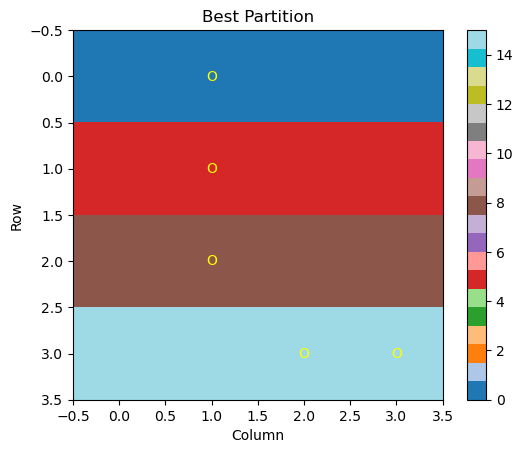

In [31]:
# Plot the best partition, if z[i, j] = 1, then small block i is in district j. Color the district with the same color and plot the nominal points
plt.imshow(districts, cmap="tab20")
plt.colorbar()
plt.xlabel("Column")
plt.ylabel("Row")
plt.title("Best Partition")
# plot the nominal points on the heatmap
for i in range(n):
    for j in range(n):
        if i * n + j in nominal_points:
            plt.text(j, i, 'O', ha='center', va='center', color='yellow')
plt.show()

================START 5==================

Gurobi solving primal for n = 5
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 26 rows, 650 columns and 1225 nonzeros
Model fingerprint: 0xfbbd69e0
Model has 26 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e-02, 2e-01]
  QRHS range       [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 127 rows, 726 columns, 2001 nonzeros
Presolved model has 26 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.025e+03
 Factor NZ  : 4.052e+03
 Factor Ops : 1.467e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Pri

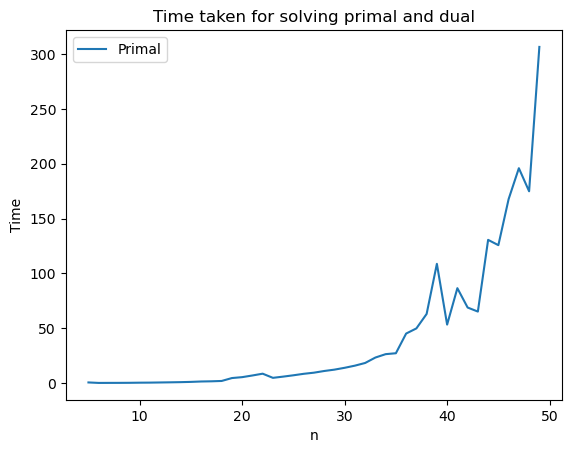

In [126]:
import time

primal_time, dual_time = {}, {}

for n in range(5, 50, 1):
    print(f"================START {n}==================\n")
    n_sq = n * n
    
    # Marginal nominal distribution
    p = np.zeros(n_sq,)
    # Choose k nominal points in the range of n_sq
    k = 11
    nominal_points = np.random.choice(n_sq, k, replace=False)
    nominal_points = np.sort(nominal_points)
    # Set the probabilities of the chosen points to be 1/k
    p[nominal_points] = 1 / k

    cost = np.array([[np.linalg.norm(np.array([i // n, i % n]) - np.array([j // n, j % n])) for j in range(n_sq)] for i in range(n_sq)])
    radius = 0.25

    start_time = time.time()
    print(f"Gurobi solving primal for n = {n}")
    optimized_primal = gurobi_solves_primal(n, p, cost, radius)
    print(f"Time taken for Gurobi primal: {time.time() - start_time}")
    primal_time[n] = time.time() - start_time

    if optimized_primal.status == GRB.OPTIMAL:
        print(f"Optimal objective value: {optimized_primal.ObjVal}")
    else:
        print("No optimal solution found")

    # start_time = time.time()
    # print(f"Gurobi solving dual for n = {n}")
    # optimized_dual = copt_solves_dual(n, p, cost, radius)
    # print(f"Time taken for COPT dual: {time.time() - start_time}")
    # dual_time[n] = time.time() - start_time
    # if optimized_dual.status == COPT.OPTIMAL:
    #     print(f"Optimal objective value: {optimized_dual.ObjVal}")
    # else:
    #     print("No optimal solution found")
    print(f"================END {n}==================\n")


# plot the time taken for primal and dual
plt.plot(list(primal_time.keys()), list(primal_time.values()), label='Primal')
# plt.plot(list(dual_time.keys()), list(dual_time.values()), label='Dual')
plt.xlabel('n')
plt.ylabel('Time')
plt.title('Time taken for solving primal and dual')
plt.legend()
plt.show()


In [129]:
nominal_points

array([  47,  181,  226,  456, 1167, 1433, 1504, 1700, 1714, 2174, 2266])

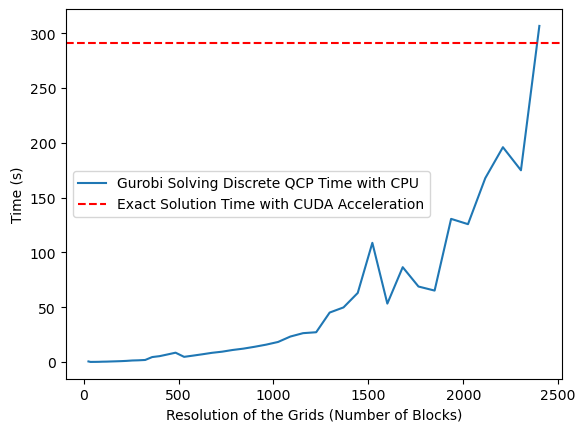

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

resolutions = np.array(list(primal_time.keys()))**2
sns.lineplot(x=resolutions, y=list(primal_time.values()), label='Gurobi Solving Discrete QCP Time with CPU')
plt.axhline(y=(9*60+42.3)/2, color='red', linestyle='--', label='Exact Solution Time with CUDA Acceleration')
plt.xlabel('Resolution of the Grids (Number of Blocks)')
plt.ylabel('Time (s)')
plt.legend(loc='center left')


In [139]:
np.array(primal_time.keys())

array(dict_keys([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
      dtype=object)

Primal time: 1.1922362611020683 * n + -14.41140617633711


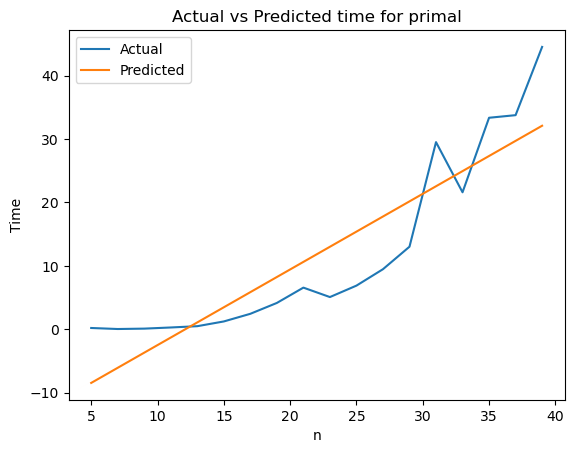

In [30]:
# Fit the primal time
from sklearn.linear_model import LinearRegression

X = np.array(list(primal_time.keys())).reshape(-1, 1)
y = np.array(list(primal_time.values())).reshape(-1, 1)

reg = LinearRegression().fit(X, y)
print(f"Primal time: {reg.coef_[0][0]} * n + {reg.intercept_[0]}")

# Plot the prediction and actual primal time
plt.plot(list(primal_time.keys()), list(primal_time.values()), label='Actual')
plt.plot(list(primal_time.keys()), reg.predict(X), label='Predicted')
plt.xlabel('n')
plt.ylabel('Time')
plt.title('Actual vs Predicted time for primal')
plt.legend()

Dual time: 0.06229049454491286 * exp(0.31369654334496194 * n) + -2.3215372037226674


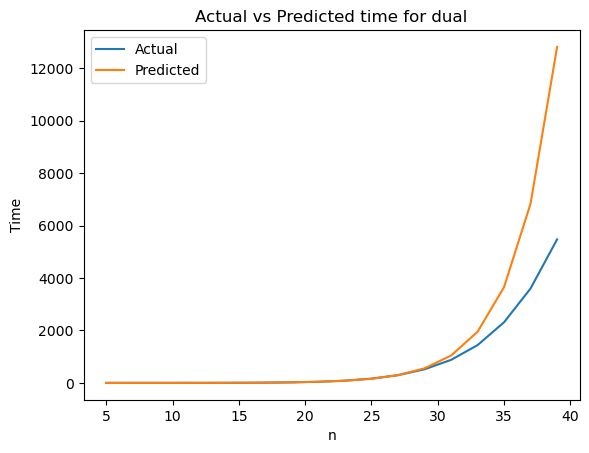

In [39]:
# Fit the dual time using exponential regression
from scipy.optimize import curve_fit

def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

X = np.array(list(dual_time.keys()))
y = np.array(list(dual_time.values()))

fitted_X = X[:12]
fitted_y = y[:12]

popt, _ = curve_fit(exponential_func, fitted_X, fitted_y)
print(f"Dual time: {popt[0]} * exp({popt[1]} * n) + {popt[2]}")

# Plot the prediction and actual dual time
plt.plot(list(dual_time.keys()), list(dual_time.values()), label='Actual')
plt.plot(list(dual_time.keys()), exponential_func(X, *popt), label='Predicted')
plt.xlabel('n')
plt.ylabel('Time')
plt.title('Actual vs Predicted time for dual')
plt.legend()

In [40]:
dual_time

{5: 0.13657903671264648,
 7: 0.07320284843444824,
 9: 0.130079984664917,
 11: 0.4062767028808594,
 13: 1.1453800201416016,
 15: 3.209228038787842,
 17: 8.107064008712769,
 19: 18.83030915260315,
 21: 40.685718059539795,
 23: 82.94169807434082,
 25: 160.53183794021606,
 27: 292.99775075912476,
 29: 517.534176826477,
 31: 875.8850340843201,
 33: 1437.963722229004,
 35: 2311.8065831661224,
 37: 3601.128242969513,
 39: 5472.197643041611}

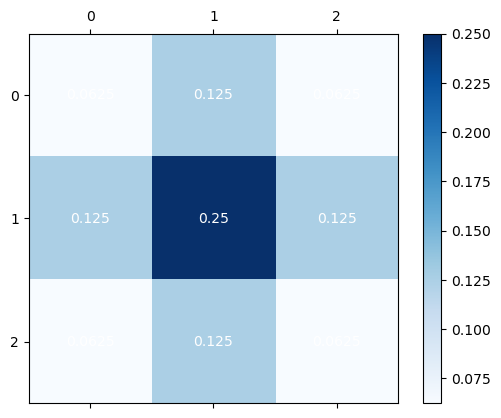

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Define the grid values
grid_values = np.array([[1, 2, 1],
                        [2, 4, 2],
                        [1, 2, 1]])

grid_values = grid_values / np.sum(grid_values)
# Create a figure and axis
fig, ax = plt.subplots()

# Use matshow to display the grid with values
cax = ax.matshow(grid_values, cmap='Blues')

# Add the grid values as text
for (i, j), val in np.ndenumerate(grid_values):
    ax.text(j, i, f'{val}', ha='center', va='center', color='white')

# Add color bar for reference
plt.colorbar(cax)

# Set labels for clarity
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

# Display the plot
plt.show()
